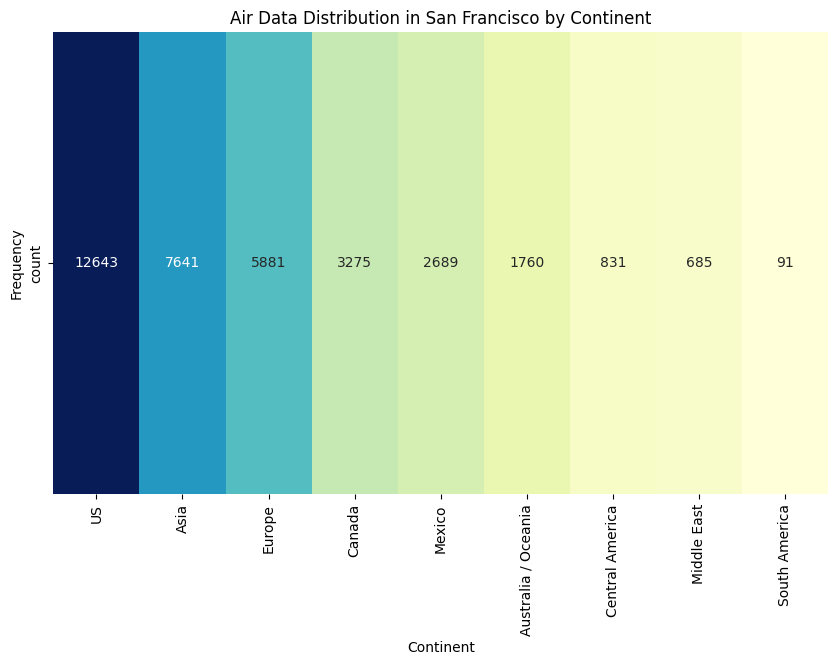

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Air_Traffic_Passenger_Statistics_20240408.csv')

continent_counts = data['GEO Region'].value_counts()

# Convert the series to a DataFrame and transpose it
continent_counts_df = pd.DataFrame(continent_counts).T

plt.figure(figsize=(10, 6))
sns.heatmap(continent_counts_df, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title('Air Data Distribution in San Francisco by Continent')
plt.xlabel('Continent')
plt.ylabel('Frequency')
plt.show()

In [14]:
import folium
from folium.plugins import HeatMap
from geopy.geocoders import Nominatim

# Initialize geolocator
geolocator = Nominatim(user_agent="geoapiExercises")

# Get counts for each 'GEO Region'
region_counts = data['GEO Region'].value_counts()

# For each unique region, get the latitude, longitude, and count
location_data = []
for region, count in region_counts.items():
    location = geolocator.geocode(region)
    if location:
        location_data.append([location.latitude, location.longitude, count])

# Create a map centered around some location
m = folium.Map(location=[45.5236, -122.6750])

# Add the heatmap with adjusted radius and blur
HeatMap(location_data, radius=15, blur=10).add_to(m)

# Display the map
m